In [1]:
# basic_detector.ipynb
# Authors: Stephan Meighen-Berger
# An (over-)simplified detector simulation chain

In [34]:
# imports
# General imports
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

# Some custom stuff
from fennel import Fennel

In [11]:
# random state seed
rng = np.random.RandomState(1337)

In [54]:
# Injected flux
energy_bins = np.logspace(np.log10(0.07943282347242814), 11, 122)  # in GeV
energy_grid = np.sqrt(energy_bins[1:] * energy_bins[:-1])
energy_widths = (energy_bins[1:] + energy_bins[:-1]) / 2

path_to_data = '../data/'
with open(path_to_data + 'mceq_numu_grid.pkl', 'rb') as handle:
    numu_flux = pkl.load(handle)

with open(path_to_data + 'mceq_nue_grid.pkl', 'rb') as handle:
    nue_flux = pkl.load(handle)

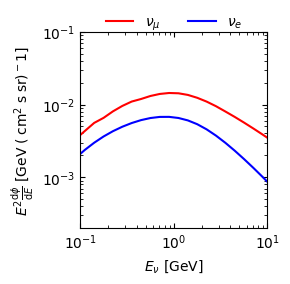

In [4]:
# Let's plot it
# -----------------------------------------------------------
# plot
fig, ax = plt.subplots(1, 1, figsize=(3,3))

mag = 2

ax.plot(
    energy_grid,
    numu_flux * energy_grid**mag,
    color='r',
    ls='-',
    label=r'$\nu_\mu$'

)

ax.plot(
    energy_grid,
    nue_flux * energy_grid**mag,
    color='b',
    ls='-',
    label=r'$\nu_e$'
)
# -----------------------------------------------------------
# axis
ax.set_xlim(1e-1, 1e1)
ax.set_ylim(2e-4, 1e-1)
ax.set_yscale('log')
ax.set_xscale('log')
# -----------------------------------------------------------
# legend
ax.legend(frameon=False, ncols=3, loc=9, bbox_to_anchor=(0.5, 1.15))
# -----------------------------------------------------------
# labels
ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"$E^2\frac{\mathrm{d}\phi}{\mathrm{d}E}\;\mathrm{[ GeV\;(\;cm^2\;s\;sr)^-1]}$")
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
fig.tight_layout()
# fig.savefig('atmospheric_flux.pdf', bbox_inches='tight', dpi=500)

In [5]:
# The injection
def cross_section_CC(E: np.ndarray, scale=1e-38) -> np.ndarray:
    """ Oversimplified neutrino cross section

    Parameters
    ----------
    E: np.ndarray
        The energies of interest in GeV

    scale: float
        Optional: The scale of the cross section at 1 GeV
    """
    return scale * np.sqrt(E)

def cross_section_NC(E: np.ndarray, scale=1e-38) -> np.ndarray:
    """ Oversimplified neutrino cross section

    Parameters
    ----------
    E: np.ndarray
        The energies of interest in GeV

    scale: float
        Optional: The scale of the cross section at 1 GeV
    """
    return cross_section_CC(E, scale=scale) * 1./3.

In [6]:
# The detector
demo_sphere_radius = 10 * 1e2  # in cm
volume_detector = demo_sphere_radius**3 * 4 / 3 * np.pi

In [7]:
# Light-yields and propagation
fl = Fennel()

In [8]:
z_grid = np.linspace(0, 1e3, 1000)
wavelengths = np.linspace(350., 500., 100)
dc_em, dc_sample_em, _, _, zp_em, _ = fl.auto_yields(1e0, 11, z_grid=np.linspace(0, 1e3, 1000), wavelengths=wavelengths)
dc_had, dc_sample_had, _, _, zp_had, _ = fl.auto_yields(1e0, 211, z_grid=np.linspace(0, 1e3, 1000), wavelengths=wavelengths)

/home/unimelb.edu.au/smeighenberg/envs/erebus/lib/python3.10/site-packages/fennel/hadron_cascades.py:184: RuntimeWarning: divide by zero encountered in double_scalars
  em_fraction_sd = sigma0 * np.log(E)**(-gamma)
/home/unimelb.edu.au/smeighenberg/envs/erebus/lib/python3.10/site-packages/fennel/hadron_cascades.py:361: RuntimeWarning: divide by zero encountered in double_scalars
  c = c_pars[0] * (np.log(E))**c_pars[1]
/home/unimelb.edu.au/smeighenberg/envs/erebus/lib/python3.10/site-packages/fennel/hadron_cascades.py:362: RuntimeWarning: divide by zero encountered in double_scalars
  d = d_pars[0] * (np.log(E))**d_pars[1]
/home/unimelb.edu.au/smeighenberg/envs/erebus/lib/python3.10/site-packages/fennel/hadron_cascades.py:315: RuntimeWarning: invalid value encountered in multiply
  (a * np.exp(b * np.abs(


In [9]:
# Total photon counts
em_counts = np.trapz(dc_em, wavelengths)
had_counts = np.trapz(dc_had, wavelengths)

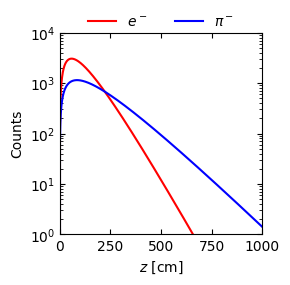

In [10]:
# Let's plot it
# -----------------------------------------------------------
# plot
fig, ax = plt.subplots(1, 1, figsize=(3,3))

mag = 2

ax.plot(
    z_grid,
    zp_em[0] / np.trapz(zp_em[0], x=z_grid) * em_counts,
    color='r',
    ls='-',
    label=r'$e^-$'

)

ax.plot(
    z_grid,
    zp_em[0] / np.trapz(zp_em[0], x=z_grid) * em_counts,
    color='r',
    ls='-',
    label=r'$e^-$'

)

ax.plot(
    z_grid,
    zp_had[0] / np.trapz(zp_had[0], x=z_grid) * had_counts,
    color='b',
    ls='-',
    label=r'$\pi^-$'
)
# -----------------------------------------------------------
# axis
ax.set_xlim(0, 1e3)
ax.set_ylim(1e0, 1e4)
ax.set_yscale('log')
ax.set_xscale('linear')
# -----------------------------------------------------------
# legend
ax.legend(frameon=False, ncols=3, loc=9, bbox_to_anchor=(0.5, 1.15))
# -----------------------------------------------------------
# labels
ax.set_xlabel(r"$z$ [cm]")
ax.set_ylabel(r"Counts")
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
fig.tight_layout()
# fig.savefig('atmospheric_flux.pdf', bbox_inches='tight', dpi=500)

In [22]:
# Sampling function for the interaction
def spatial_sampling(nsamples: int, detector_radius: float, rng: np.random.RandomState) -> np.ndarray:
    """ generates an event sample

    Parameters
    ----------
    nsamples: int
        Number of samples
    detector_radius: float
        The radius of the detector
    rng: np.random.RandomState
        The random state generator

    Returns
    -------
    rsamples: np.ndarray
        Sampled radius
    phi_samples: np.ndarray
        Sampled phi (interaction point and outgoing)
    theta_samples: np.ndarray
        Sampled theta (interaction point and outgoing)
    """
    radius_samples = rng.uniform(0, detector_radius, size=nsamples)
    phi_samples = rng.uniform(0., 360., size=(nsamples, 2))
    theta_samples = rng.uniform(0., 180., size=(nsamples, 2))
    return radius_samples, phi_samples, theta_samples

In [49]:
rsampl, phisamp, thetasampl = spatial_sampling(50, demo_sphere_radius, rng)

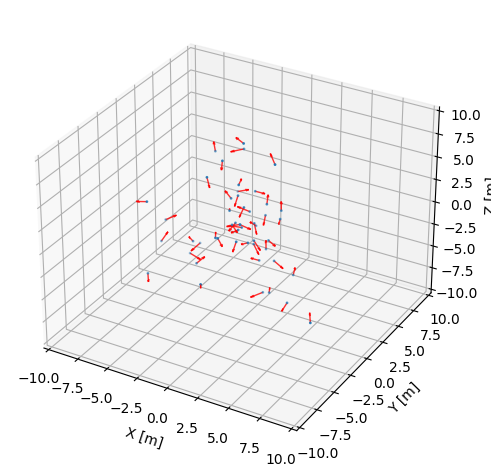

In [50]:
# Let's plot it
# -----------------------------------------------------------
# plot

theta, phi = np.linspace(0, 2 * np.pi, 40), np.linspace(0, np.pi, 40)
THETA, PHI = np.meshgrid(theta, phi)
R = np.cos(PHI**2)
X_int = rsampl * np.sin(phisamp[:, 0]) * np.cos(thetasampl[:, 0])
Y_int = rsampl * np.sin(phisamp[:, 0]) * np.sin(thetasampl[:, 0])
Z_int = rsampl * np.cos(phisamp[:, 0])

arrow_scale = 1

X_dir = arrow_scale * np.sin(phisamp[:, 1]) * np.cos(thetasampl[:, 1])
Y_dir = arrow_scale * np.sin(phisamp[:, 1]) * np.sin(thetasampl[:, 1])
Z_dir = arrow_scale * np.cos(phisamp[:, 1])
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(
    X_int / 1e2, Y_int / 1e2, Z_int / 1e2, s=1
)

for idevent, _ in enumerate(rsampl):
    #ax.plot([mean_x,v[0]], [mean_y,v[1]], [mean_z,v[2]], color='red', alpha=0.8, lw=3)
    #I will replace this line with:
    ax.quiver(
        X_int[idevent] / 1e2, Y_int[idevent] / 1e2, Z_int[idevent] / 1e2,
        X_dir[idevent], Y_dir[idevent], Z_dir[idevent],
        color = 'red', alpha = .8, lw = 1
        )
# -----------------------------------------------------------
# axis
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
# -----------------------------------------------------------
# labels
ax.set_xlabel(r"X [m]")
ax.set_ylabel(r"Y [m]")
ax.set_zlabel(r"Z [m]")
fig.tight_layout()
# fig.savefig('atmospheric_flux.pdf', bbox_inches='tight', dpi=500)

In [65]:
#  simulation parameters
year = 365 * 24 * 60 * 60
time = 10 * year
molecules_per_cm3 = 3.345 * 10**22
molecules_detector = molecules_per_cm3 * volume_detector
nTargets = (16 + 2) * molecules_detector  # H2O

detector_factor = nTargets * time * np.pi * 4

In [66]:
interactions_numu_nc = detector_factor * numu_flux * cross_section_NC(energy_grid) * energy_widths
interactions_nue_CC = detector_factor * nue_flux * cross_section_CC(energy_grid) * energy_widths
interactions_nue_NC = detector_factor * nue_flux * cross_section_NC(energy_grid) * energy_widths

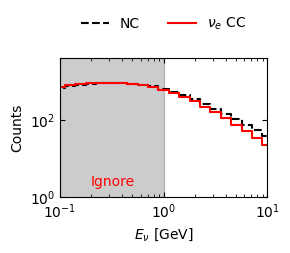

In [74]:
# Let's plot it
# -----------------------------------------------------------
# plot
fig, ax = plt.subplots(1, 1, figsize=(3,3))

mag = 2

ax.step(
    energy_grid,
    interactions_numu_nc + interactions_nue_NC,
    color='k',
    ls='--',
    label=r'NC'

)

ax.step(
    energy_grid,
    interactions_nue_CC,
    color='r',
    ls='-',
    label=r'$\nu_e$ CC'

)

ax.fill_betweenx([0, 1e5], 0, 1e0, color='k', alpha=0.2)
# -----------------------------------------------------------
# axis
ax.set_xlim(1e-1, 1e1)
ax.set_ylim(1e0, 4e3)
ax.set_yscale('log')
ax.set_xscale('log')
# -----------------------------------------------------------
# legend
ax.legend(frameon=False, ncols=2, loc=9, bbox_to_anchor=(0.5, 1.4))
# -----------------------------------------------------------
# labels
ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Counts")
ax.text(2e-1, 2, "Ignore", color='r')
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
fig.tight_layout()
# fig.savefig('atmospheric_flux.pdf', bbox_inches='tight', dpi=500)

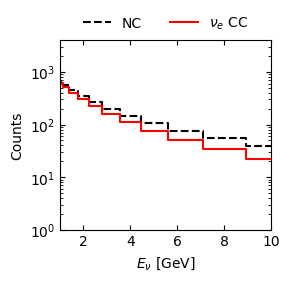

In [78]:
# Let's plot it
# -----------------------------------------------------------
# plot
fig, ax = plt.subplots(1, 1, figsize=(3,3))

mag = 2

ax.step(
    energy_grid,
    interactions_numu_nc + interactions_nue_NC,
    color='k',
    ls='--',
    label=r'NC'

)

ax.step(
    energy_grid,
    interactions_nue_CC,
    color='r',
    ls='-',
    label=r'$\nu_e$ CC'

)

# ax.fill_betweenx([0, 1e5], 0, 1e0, color='k', alpha=0.2)
# -----------------------------------------------------------
# axis
ax.set_xlim(1e0, 1e1)
ax.set_ylim(1e0, 4e3)
ax.set_yscale('log')
ax.set_xscale('linear')
# -----------------------------------------------------------
# legend
ax.legend(frameon=False, ncols=2, loc=9, bbox_to_anchor=(0.5, 1.2))
# -----------------------------------------------------------
# labels
ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Counts")
# ax.text(2e-1, 2, "Ignore", color='r')
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
fig.tight_layout()
# fig.savefig('atmospheric_flux.pdf', bbox_inches='tight', dpi=500)

In [ ]:
def event_generator(nsamples: np.ndarray, energy_grid: np.ndarray, type='CC') -> np.ndarray:
    """ generates particle events within the detector
    """
    # Spatial generation
    for nsamp in nsamples:
        spatial_sampling(50, demo_sphere_radius, rng)
    if type == 'CC':
        
    else:

    

In [ ]:
# Selection criteria

def fully_contained(events: np.ndarray, detector_radius) -> np.ndarray:
    """ generates a boolean array to keep or reject events
    """
    